# Comparative Analysis of Brain MRI Segmentation Software (FSL and Synthseg)
## Metrics Evaluation and Age-Volume Prediction using Machine Learning

**Contributers: Jonathan Williams, Eddy Rosales, and Jesse Maki**

---

*Contents of this notebook*



1.   Data Preprocess and Volume Calculations
2.   Basic Statistical Measures and EDA Analysis for the IXI Dataset
  * 5 number summary for age
  * Distribution graphs for age, height, weight, GM_VOLUME, WM_MATTER, CSF_VOLUME, TBV, IBV, ethnicity, and gender
  * Scatter plots of all 5 volume measures and age
  * Box plots of WM_VOLUME, GM_VOLUME, and CSF_VOLUME
3. Machine Learning Predictions
  *






## Import Modules & Libraries

In [11]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

## Preprocessing - Volume Calculations 

Volumes were calculated by data processing pipeline to calculate white matter volumes from brain imaging data in the Probabilistic Voxel-based Analysis (PVE) format. It extracts subject IDs, processes PVE data, and computes the volumes for each subject. The calculated volumes are then integrated into an existing CSV file for further analysis and exploration.

**White Matter Calculations**

In [6]:
# Imports
import os
import numpy as np
import nibabel as nib
import csv

# Set data directory
data_directory = 'PVE/0'

# Get list of subject IDs
all_files = os.listdir(data_directory)
subject_list = [filename.replace('.nii_seg_pve_0.nii.gz', '') for filename in all_files if filename.endswith('.nii_seg_pve_0.nii.gz')]

# Function to extract numeric ID
def extract_numeric_id(subject_id):
    return int(''.join(filter(str.isdigit, subject_id)))

# Calculate white matter volumes
wm_volumes = []
for subject in subject_list:
    pve_file_wm = os.path.join(data_directory, f'{subject}.nii_seg_pve_0.nii.gz')

    # Load white matter PVE file
    pve_data_wm = nib.load(pve_file_wm).get_fdata()

    # Calculate white matter volume
    wm_volume = np.sum(pve_data_wm)

    # Append to list
    wm_volumes.append(wm_volume)

# Read CSV file
csv_file_path = 'IXI-FSL.csv'
csv_data = []

with open(csv_file_path, 'r') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        csv_data.append(row)

# Add volumes to CSV
for i, subject_id in enumerate(subject_list):
    numeric_subject_id = extract_numeric_id(subject_id)

    for row in csv_data:
        if 'IXI_ID' in row and int(row['IXI_ID']) == numeric_subject_id:
            row['WM_VOLUME'] = wm_volumes[i]
            break

# Write updated CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = list(csv_data[0].keys())
    if 'WM_VOLUME' not in fieldnames:
        fieldnames.append('WM_VOLUME')

    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    csv_writer.writeheader()
    csv_writer.writerows(csv_data)

print("White Matter volumes added to the CSV file.")

White Matter volumes added to the CSV file.


**Gray Matter Calculations**

In [8]:
# Imports
import os
import numpy as np
import nibabel as nib
import csv

# Set data directory
data_directory = 'PVE/1'

# Get list of subject IDs
all_files = os.listdir(data_directory)
subject_list = [filename.replace('.nii_seg_pve_1.nii.gz', '') for filename in all_files if filename.endswith('.nii_seg_pve_1.nii.gz')]

# Function to extract numeric ID
def extract_numeric_id(subject_id):
    return int(''.join(filter(str.isdigit, subject_id)))

# Calculate gray matter volumes
gm_volumes = []
for subject in subject_list:
    pve_file_gm = os.path.join(data_directory, f'{subject}.nii_seg_pve_1.nii.gz')

    # Load gray matter PVE file
    pve_data_gm = nib.load(pve_file_gm).get_fdata()

    # Calculate gray matter volume
    gm_volume = np.sum(pve_data_gm)

    # Append to list
    gm_volumes.append(gm_volume)

# Read CSV file
csv_file_path = 'IXI-FSL.csv'
csv_data = []

with open(csv_file_path, 'r') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        csv_data.append(row)

# Add volumes to CSV
for i, subject_id in enumerate(subject_list):
    numeric_subject_id = extract_numeric_id(subject_id)

    for row in csv_data:
        if 'IXI_ID' in row and int(row['IXI_ID']) == numeric_subject_id:
            row['GM_VOLUME'] = gm_volumes[i]
            break

# Write updated CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = list(csv_data[0].keys())
    if 'GM_VOLUME' not in fieldnames:
        fieldnames.append('GM_VOLUME')

    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    csv_writer.writeheader()
    csv_writer.writerows(csv_data)

print("Gray Matter volumes added to the CSV file.")

Gray Matter volumes added to the CSV file.


**Cerebrospinal Fluid Calculations**

In [9]:
# Imports
import os
import numpy as np
import nibabel as nib
import csv

# Set data directory
data_directory = 'PVE/2'

# Get list of subject IDs
all_files = os.listdir(data_directory)
subject_list = [filename.replace('.nii_seg_pve_2.nii.gz', '') for filename in all_files if filename.endswith('.nii_seg_pve_2.nii.gz')]

# Function to extract numeric ID
def extract_numeric_id(subject_id):
    return int(''.join(filter(str.isdigit, subject_id)))

# Calculate CSF volumes
csf_volumes = []
for subject in subject_list:
    pve_file_csf = os.path.join(data_directory, f'{subject}.nii_seg_pve_2.nii.gz')

    # Load CSF PVE file
    pve_data_csf = nib.load(pve_file_csf).get_fdata()

    # Calculate CSF volume
    csf_volume = np.sum(pve_data_csf)

    # Append to list
    csf_volumes.append(csf_volume)

# Read CSV file
csv_file_path = 'IXI-FSL.csv'
csv_data = []

with open(csv_file_path, 'r') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        csv_data.append(row)

# Add volumes to CSV
for i, subject_id in enumerate(subject_list):
    numeric_subject_id = extract_numeric_id(subject_id)

    for row in csv_data:
        if 'IXI_ID' in row and int(row['IXI_ID']) == numeric_subject_id:
            row['CSF_VOLUME'] = csf_volumes[i]
            break

# Write updated CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = list(csv_data[0].keys())
    if 'CSF_VOLUME' not in fieldnames:
        fieldnames.append('CSF_VOLUME')

    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    csv_writer.writeheader()
    csv_writer.writerows(csv_data)

print("CSF volumes added to the CSV file.")

CSF volumes added to the CSV file.


## Basic Statistics and EDA Analysis of IXI Dataset

The IXI dataset in use is compromised of ≈600 subjects of T1 weighted MRI Images. 

**Contents of IXI.csv**

In [22]:
df = pd.read_csv('IXI.csv')
print(df.head(5))

   IXI_ID  SEX_ID (1=m, 2=f)  HEIGHT  WEIGHT  ETHNIC_ID  MARITAL_ID   
0       2                  2     164      58          1           4  \
1      12                  1     175      70          1           2   
2      13                  1     182      70          1           2   
3      14                  2     163      65          1           4   
4      15                  1     181      90          2           1   

   OCCUPATION_ID  QUALIFICATION_ID         DOB  DATE_AVAILABLE  STUDY_DATE   
0              1                 5  1970-01-30               1  2005-11-18  \
1              1                 5  1966-08-20               1  2005-06-01   
2              1                 5  1958-09-15               1  2005-06-01   
3              1                 5  1971-03-15               1  2005-06-09   
4              6                 5  1981-03-11               1  2005-06-23   

     AGE  
0  35.80  
1  38.78  
2  46.71  
3  34.24  
4  24.28  


**5 number summary of ages from IXI.csv**

In [23]:
df = pd.read_csv('IXI.csv')

mean_age = df['AGE'].mean()
median_age = df['AGE'].median()
mode_age = df['AGE'].mode()[0]
min_age = df['AGE'].min()
max_age = df['AGE'].max()
std_dev_age = df['AGE'].std()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode of Age: {mode_age}")
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
print(f"Age Standard Deviation: {std_dev_age}")


Mean Age: 49.41638983050848
Median Age: 50.61
Mode of Age: 53.41
Minimum Age: 19.98
Maximum Age: 86.32
Age Standard Deviation: 16.715461362894818


**Demographic Distribution of IXI.csv**

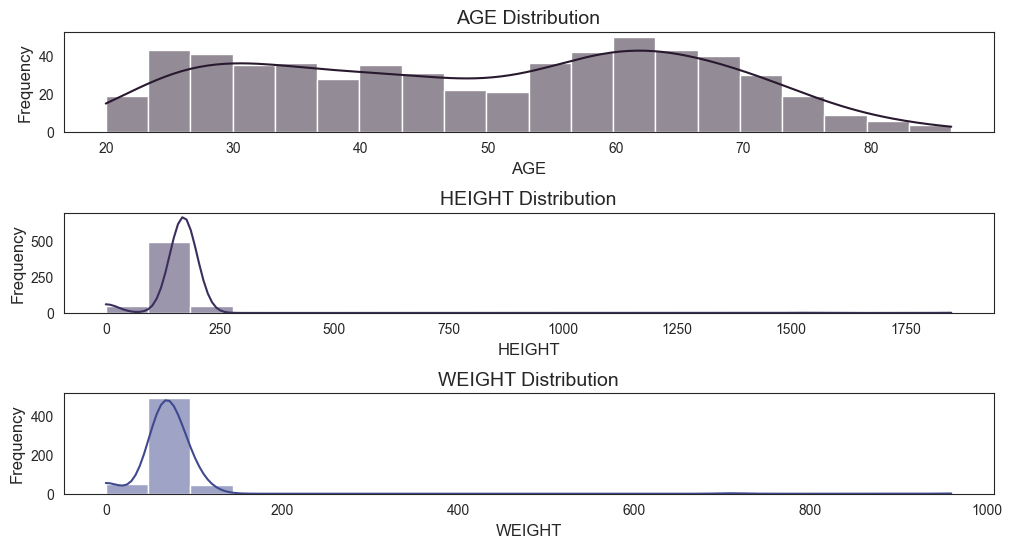

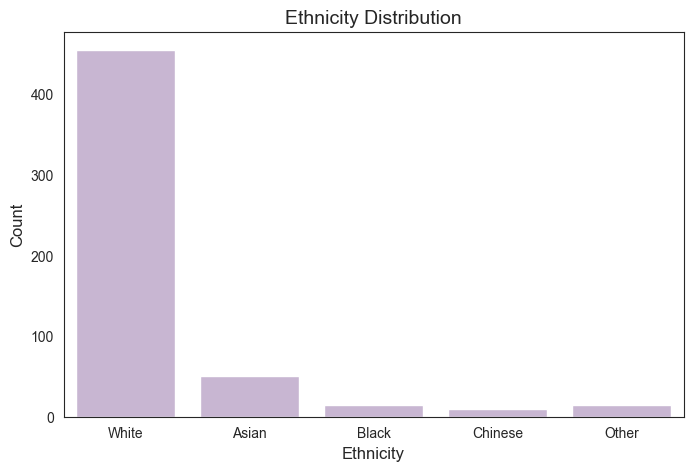

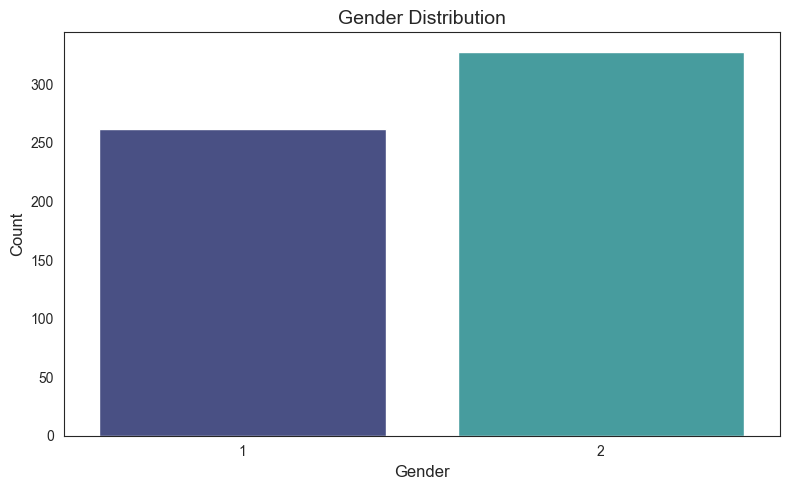

In [29]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('IXI.csv')

# Set seaborn style
sns.set_style("white")

# Color palette
palette = {"AGE": sns.color_palette("mako", 8)[0],
           "HEIGHT": sns.color_palette("mako", 8)[1],
           "WEIGHT": sns.color_palette("mako", 8)[2],
           "ETHNIC_ID": sns.color_palette("Paired", 12)[8]}

# Variables for histograms
hist_vars = ['AGE', 'HEIGHT', 'WEIGHT']

# Create histograms
fig = plt.figure(figsize=(12, 2 * len(hist_vars)))

for i, var in enumerate(hist_vars, 1):
    plt.subplot(len(hist_vars), 1, i)
    sns.histplot(df[var], bins=20, kde=True, color=palette[var])

    plt.title(f'{var} Distribution', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)


# Add spacing between plots
plt.subplots_adjust(hspace=0.8)

# Map ethnicity ids to labels
ethnic_labels = {1: 'White', 4: 'Black', 3: 'Asian',
                 6: 'Chinese', 5: 'Other'}
df['ETHNIC_ID'] = df['ETHNIC_ID'].map(ethnic_labels)

# Ethnicity bar plot
eth_fig = plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ETHNIC_ID', color=palette['ETHNIC_ID'])

plt.title('Ethnicity Distribution', fontsize=14)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Gender bar plot
sex_fig = plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SEX_ID', palette=sns.color_palette("mako", 2))

plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Tight layout
plt.tight_layout()

# Show plots
plt.show()


## Volume vs Age Correlations of FSL segmented MRI scans (IXI-FSL.csv) amd SegSynth segemented MRI scans (IXI-SEG.csv)

**Scatter plots of IXI-FSL.csv**

WM Correlation: 0.47
GM Correlation: -0.21
CSF Correlation: -0.10


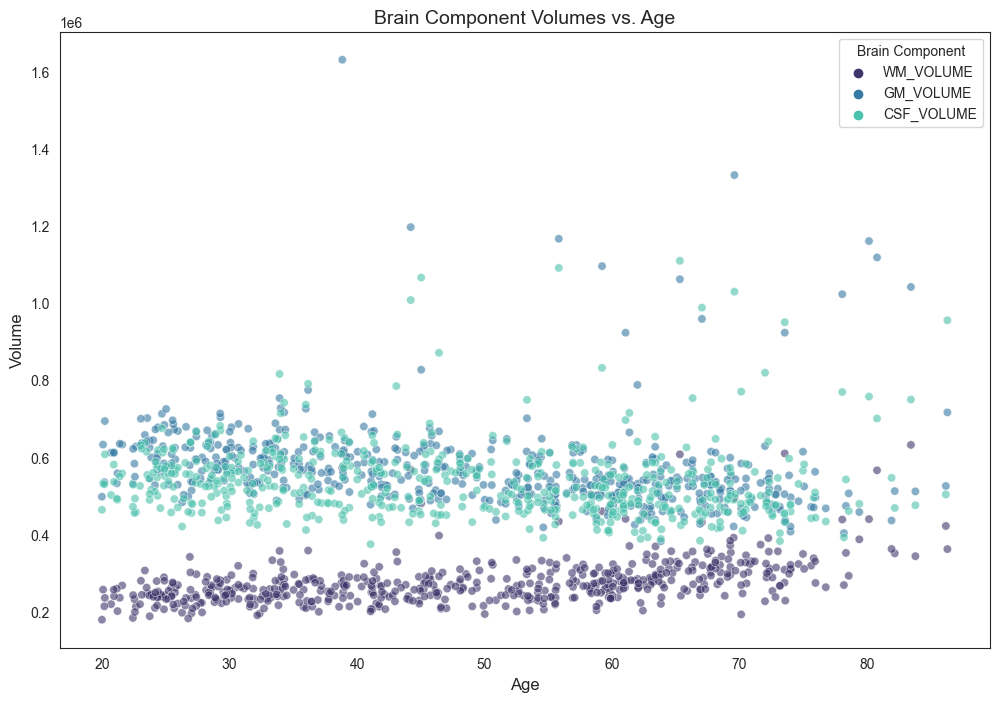

In [31]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
brain_vol_df = pd.read_csv('IXI-FSL.csv')

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Melt for easy plotting
melted_df = brain_vol_df.melt(
    id_vars='AGE',
    value_vars=['WM_VOLUME', 'GM_VOLUME', 'CSF_VOLUME'],
    var_name='Brain Component',
    value_name='Volume')

# Color palette
palette = {
    "WM_VOLUME": sns.color_palette("mako", 3)[0],
    "GM_VOLUME": sns.color_palette("mako", 3)[1],
    "CSF_VOLUME": sns.color_palette("mako", 3)[2]}

# Plot
sns.scatterplot(data=melted_df, x='AGE', y='Volume',
                hue='Brain Component', palette=palette, ax=ax, alpha=0.6)

# Axis labels and title
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)
ax.set_title('Brain Component Volumes vs. Age', fontsize=14)

# Calculate correlations
wm_corr = brain_vol_df['AGE'].corr(brain_vol_df['WM_VOLUME'])
gm_corr = brain_vol_df['AGE'].corr(brain_vol_df['GM_VOLUME'])
csf_corr = brain_vol_df['AGE'].corr(brain_vol_df['CSF_VOLUME'])

# Print correlations
print(f'WM Correlation: {wm_corr:.2f}')
print(f'GM Correlation: {gm_corr:.2f}')
print(f'CSF Correlation: {csf_corr:.2f}')

plt.show()


**Box plots of IXI-FSL.csv**

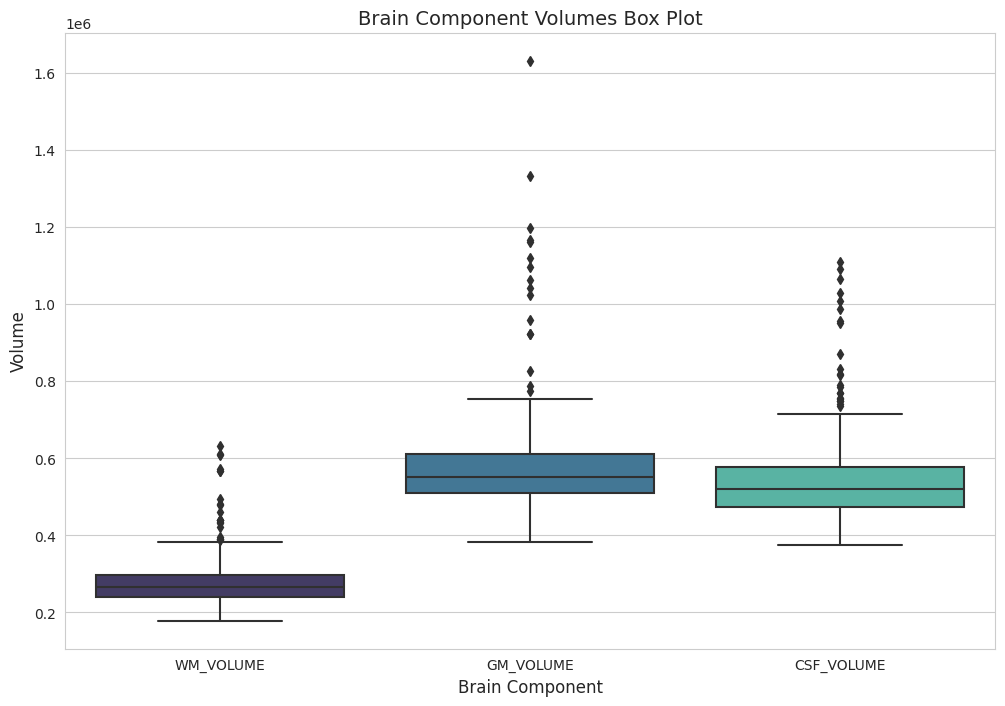

In [28]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
brain_vol_df = pd.read_csv('IXI-FSL-Cleaned.csv')

# Set seaborn style
sns.set_style("whitegrid")

# Melt for easy plotting
melted_df = brain_vol_df.melt(
    value_vars=['WM_VOLUME', 'GM_VOLUME', 'CSF_VOLUME'],
    var_name='Brain Component',
    value_name='Volume')

# Color palette
palette = {
    "WM_VOLUME": sns.color_palette("mako", 3)[0],
    "GM_VOLUME": sns.color_palette("mako", 3)[1],
    "CSF_VOLUME": sns.color_palette("mako", 3)[2]}

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate box plots
sns.boxplot(data=melted_df, x='Brain Component', y='Volume',
            palette=palette, ax=ax)

# Add axis labels and title
ax.set_xlabel('Brain Component', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)
ax.set_title('Brain Component Volumes Box Plot', fontsize=14)

# Display plot
plt.show()

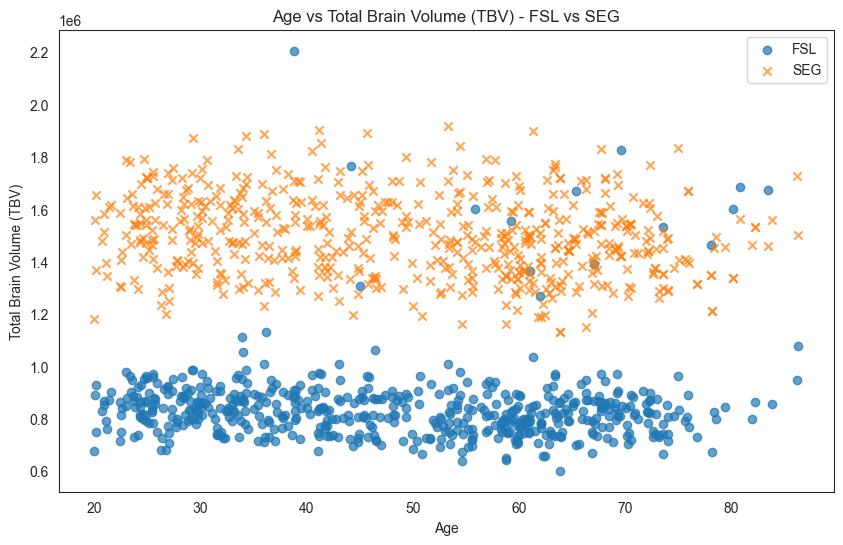

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
fsl_data = pd.read_csv('IXI-FSL.csv')
seg_data = pd.read_csv('IXI-SEG.csv')

# Filter necessary columns
fsl_age_tbv = fsl_data[['AGE', 'TBV']]
seg_age_tbv = seg_data[['AGE', 'TBV']]

# Plot the data with different shapes for FSL and SEG
plt.figure(figsize=(10, 6))
plt.scatter(fsl_age_tbv['AGE'], fsl_age_tbv['TBV'], label='FSL', alpha=0.7, marker='o')
plt.scatter(seg_age_tbv['AGE'], seg_age_tbv['TBV'], label='SEG', alpha=0.7, marker='x')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Total Brain Volume (TBV)')
plt.title('Age vs Total Brain Volume (TBV) - FSL vs SEG')
plt.legend()

# Show the plot
plt.show()


## Machine Learning Predictions

Models in testing:
  * Linear Regression
  * Random Forest Regression
  * Extreme Gradient Boosting Regression (XGBRegressor)
  * Light Gradient Boosting Machine Regressor (LGBMRegressor)

RandomForestRegressor R2: 0.5212969594641896 MAE: 8.789172358808313


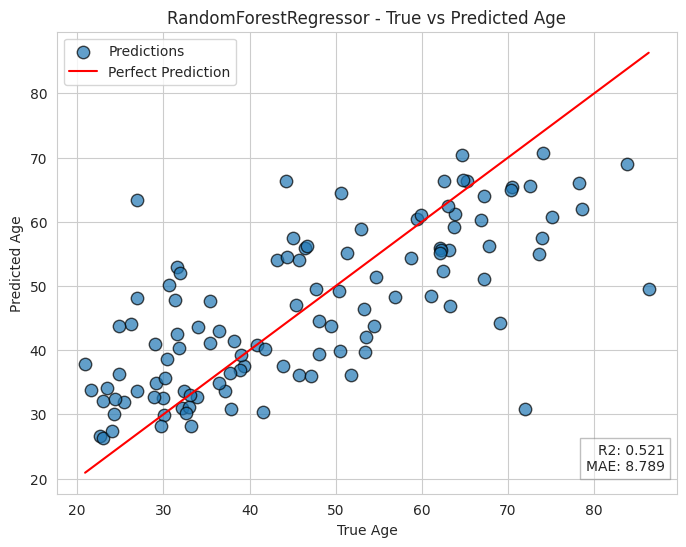

XGBRegressor R2: 0.5683669870578372 MAE: 8.412264055235196


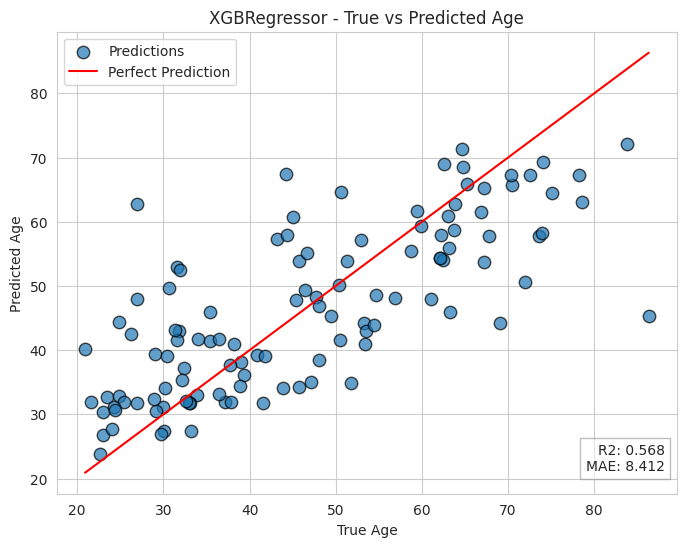

LGBMRegressor R2: 0.542529473253276 MAE: 8.763853924581277


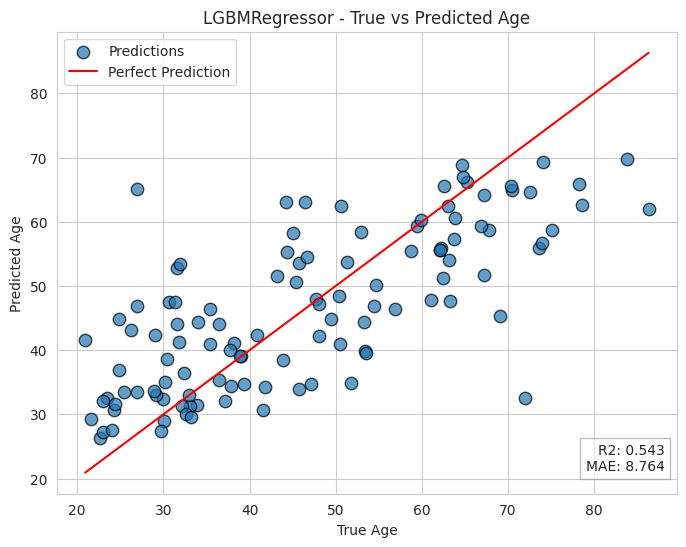

LinearRegression R2: 0.42544674928895254 MAE: 9.903987168130397


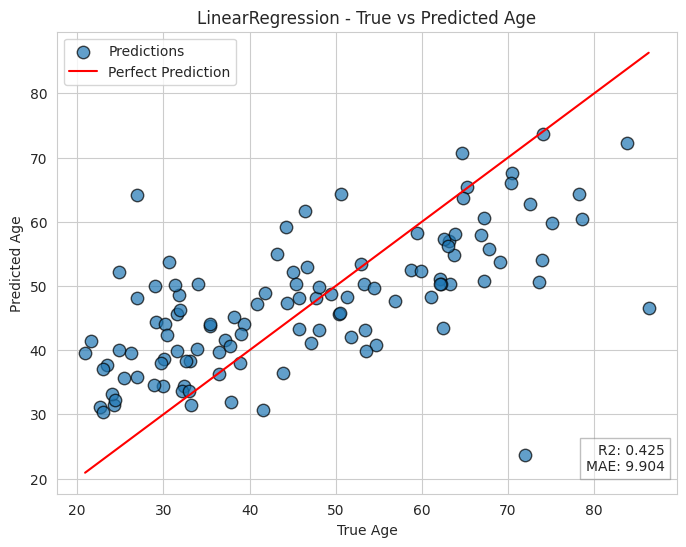

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression  # Added import
from sklearn.metrics import r2_score, mean_absolute_error

# Load data
df = pd.read_csv('/content/drive/My Drive/Final-Project/IXI-FSL-Cleaned.csv')

# Extract features and target
X = df[['CSF_VOLUME', 'GM_VOLUME', 'WM_VOLUME']]
y = df['AGE']

# Handle missing values
X = X.fillna(X.mean())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models with best hyperparameters
rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=4)
xgb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, gamma=0)
lgbm = LGBMRegressor(n_estimators=300, max_depth=5, learning_rate=0.01, num_leaves=31)
lr = LinearRegression()  # Create Linear Regression model

# Model training and evaluation
models = [rf, xgb, lgbm, lr]  # Add the Linear Regression model to the list

for model in models:
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    print(model.__class__.__name__, "R2:", r2, "MAE:", mae)

    # Plot true vs predicted age
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, preds, alpha=0.7, s=80, label='Predictions', edgecolors='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='Perfect Prediction')
    plt.xlabel('True Age')
    plt.ylabel('Predicted Age')
    plt.title(f'{model.__class__.__name__} - True vs Predicted Age')
    plt.text(0.98, 0.05, f'R2: {r2:.3f}\nMAE: {mae:.3f}', transform=plt.gca().transAxes,
             ha='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
    plt.legend()
    plt.grid(True)
    plt.show()


RandomForestRegressor R2: 0.05007543962749739 MAE: 12.636126974899405


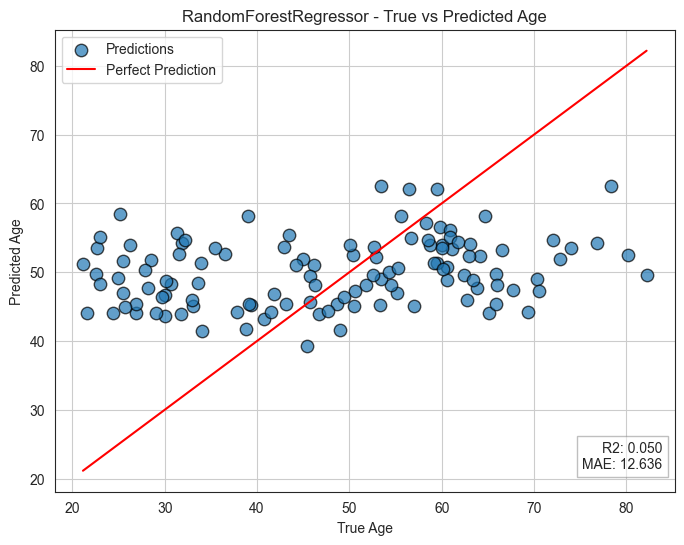

XGBRegressor R2: 0.05219447038890079 MAE: 12.824214385727702


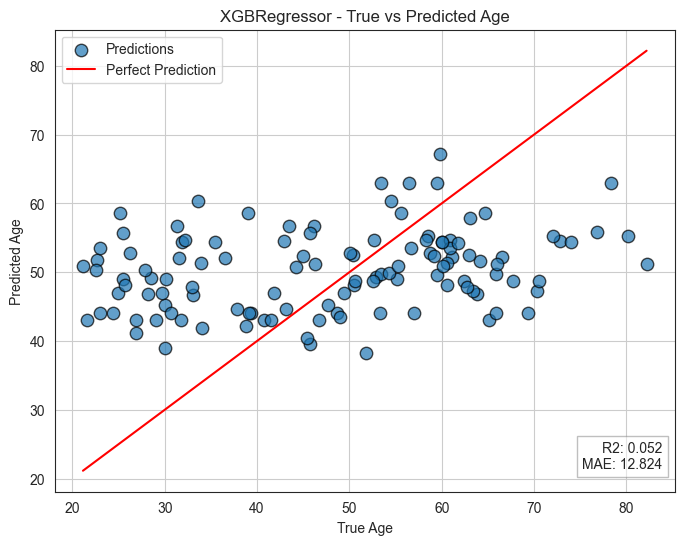

LinearRegression R2: 0.05615715540191024 MAE: 12.887730565043622


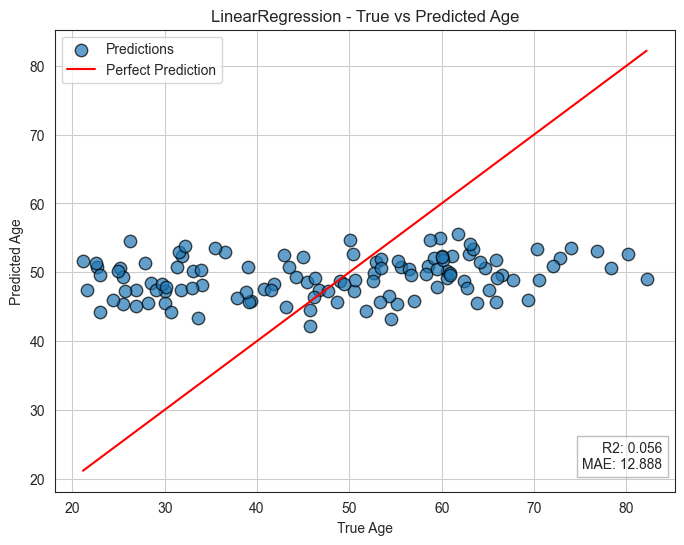

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Load data
df = pd.read_csv('IXI-SEG.csv')

# Extract features and target
X = df['TBV']
y = df['AGE']

# Handle missing values
X = X.fillna(X.mean())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test to 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models with best hyperparameters
rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=4)
xgb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, gamma=0)
lr = LinearRegression()

# Model training and evaluation
models = [rf, xgb, lr]

for model in models:
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    print(model.__class__.__name__, "R2:", r2, "MAE:", mae)

    # Plot true vs predicted age
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, preds, alpha=0.7, s=80, label='Predictions', edgecolors='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='Perfect Prediction')
    plt.xlabel('True Age')
    plt.ylabel('Predicted Age')
    plt.title(f'{model.__class__.__name__} - True vs Predicted Age')
    plt.text(0.98, 0.05, f'R2: {r2:.3f}\nMAE: {mae:.3f}', transform=plt.gca().transAxes,
             ha='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
    plt.legend()
    plt.grid(True)
    plt.show()


In [18]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, ReLU, BatchNormalization, Input, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

def data_generator(data, labels, batch_size):
    num_samples = len(data)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            x_batch = [np.array(data[i])[..., np.newaxis] for i in batch_indices]
            y_batch = labels[batch_indices]
            print(f"Generated a batch of size {len(x_batch)}")  # Added for debugging
            yield np.array(x_batch), y_batch

def create_cnn_block(input_layer, n_filters):
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(input_layer)
    x = ReLU()(x)
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=2)(x)
    x = Dropout(0.5)(x)
    return x

def create_3d_cnn(input_shape):
    input_layer = Input(shape=input_shape)
    x = create_cnn_block(input_layer, 8)
    x = create_cnn_block(x, 16)
    x = create_cnn_block(x, 32)
    x = create_cnn_block(x, 64)
    x = Flatten()(x)
    output_layer = Dense(1, activation='linear')(x)
    model = Model(input_layer, output_layer)
    return model

# Load the preprocessed data
data = np.load('/content/drive/My Drive/Final-Project/preprocessed_data0.npz')
x_train, y_train, x_val, y_val, x_test, y_test = data['x_train'], data['y_train'], data['x_val'], data['y_val'], data['x_test'], data['y_test']

batch_size = 4
train_generator = data_generator(x_train, y_train, batch_size)
validation_generator = data_generator(x_val, y_val, batch_size)

image_shape = (128, 128, 128, 1)
model = create_3d_cnn(input_shape=image_shape)
model.compile(optimizer='adam', loss='mean_squared_error')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(train_generator, steps_per_epoch=len(x_train) // batch_size, epochs=50,
          validation_data=validation_generator, validation_steps=len(x_val) // batch_size,
          callbacks=[reduce_lr, early_stopping])


Generated a batch of size 4
Epoch 1/50
Generated a batch of size 4
88/88 [==============================] - ETA: 0s - loss: 240.1375Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 1
88/88 [==============================] - 20s 178ms/step - loss: 240.1375 - val_loss: 1647.2896 - lr: 0.0010
Epoch 2/50
Generated a batch of size 4
88/88 [==============================] - ETA: 0s - loss: 154.1295Generated a 

4/4 [==============================] - 1s 122ms/step


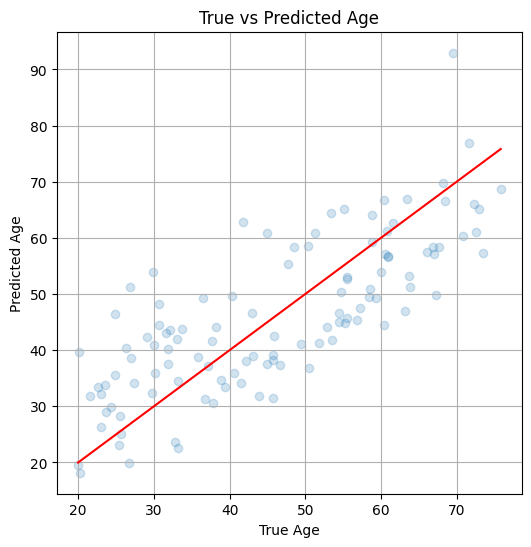

4/4 [==============================] - 2s 622ms/step
Mean Absolute Error (MAE): 8.598655541283744
Mean Squared Error (MSE): 100.91318239364956


In [19]:
import matplotlib.pyplot as plt

# Predict the age on the test set
y_pred = model.predict(x_test)

# Plot true vs predicted age
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True vs Predicted Age')
plt.grid(True)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict the age on the test set
y_pred = model.predict(x_test)

# Compute MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")



In [8]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, ReLU, BatchNormalization, Input, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

def data_generator(data, labels, batch_size):
    num_samples = len(data)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            x_batch = [np.array(data[i])[..., np.newaxis] for i in batch_indices]
            y_batch = labels[batch_indices]
            print(f"Generated a batch of size {len(x_batch)}")  # Added for debugging
            yield np.array(x_batch), y_batch

def create_cnn_block(input_layer, n_filters):
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(input_layer)
    x = ReLU()(x)
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=2)(x)
    x = Dropout(0.5)(x)
    return x

def create_3d_cnn(input_shape):
    input_layer = Input(shape=input_shape)
    x = create_cnn_block(input_layer, 8)
    x = create_cnn_block(x, 16)
    x = create_cnn_block(x, 32)
    x = create_cnn_block(x, 64)
    x = Flatten()(x)
    output_layer = Dense(1, activation='linear')(x)
    model = Model(input_layer, output_layer)
    return model

# Load the preprocessed data
data = np.load('/content/drive/My Drive/Final-Project/preprocessed_data1.npz')
x_train, y_train, x_val, y_val, x_test, y_test = data['x_train'], data['y_train'], data['x_val'], data['y_val'], data['x_test'], data['y_test']

batch_size = 4
train_generator = data_generator(x_train, y_train, batch_size)
validation_generator = data_generator(x_val, y_val, batch_size)

image_shape = (128, 128, 128, 1)
model = create_3d_cnn(input_shape=image_shape)
model.compile(optimizer='adam', loss='mean_squared_error')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(train_generator, steps_per_epoch=len(x_train) // batch_size, epochs=50,
          validation_data=validation_generator, validation_steps=len(x_val) // batch_size,
          callbacks=[reduce_lr, early_stopping])


Generated a batch of size 4
Epoch 1/50
Generated a batch of size 4
90/90 [==============================] - ETA: 0s - loss: 254.8076Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 4
Generated a batch of size 2
90/90 [==============================] - 21s 183ms/step - loss: 254.8076 - val_loss: 1241.9872 - lr: 0.0010
Epoch 2/50
Generated a batch of size 4
90/90 [==============================] - ETA: 0s - loss: 187.7122Generated a 

4/4 [==============================] - 1s 262ms/step


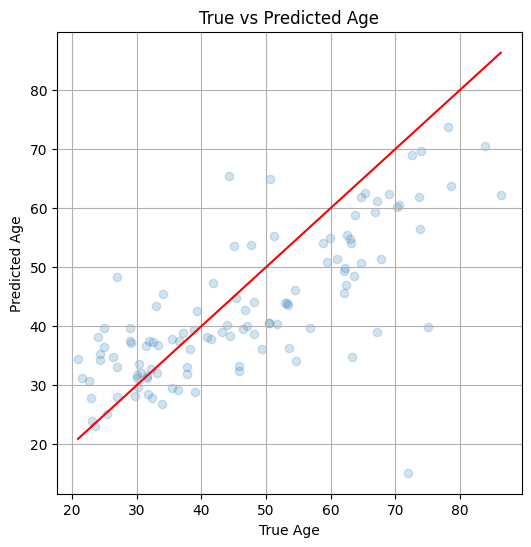

4/4 [==============================] - 2s 567ms/step
Mean Absolute Error (MAE): 8.83070656970539
Mean Squared Error (MSE): 140.08370673707034


In [9]:
import matplotlib.pyplot as plt

# Predict the age on the test set
y_pred = model.predict(x_test)

# Plot true vs predicted age
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True vs Predicted Age')
plt.grid(True)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict the age on the test set
y_pred = model.predict(x_test)

# Compute MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

